##### Dataset

In [1]:
# banknotes.csv
# https://mitu.co.in/dataset

##### Import the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##### Load the dataset

In [6]:
df = pd.read_csv('datasets/banknotes.csv')

In [7]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [8]:
df.shape

(1372, 5)

In [9]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

##### Separate the input and output variables

In [11]:
# input data
x = df.drop('Class', axis = 1)

# output data
y = df['Class']

In [13]:
x.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy'], dtype='object')

##### Exploratory Data Analysis

In [15]:
np.unique(y)

array([0, 1])

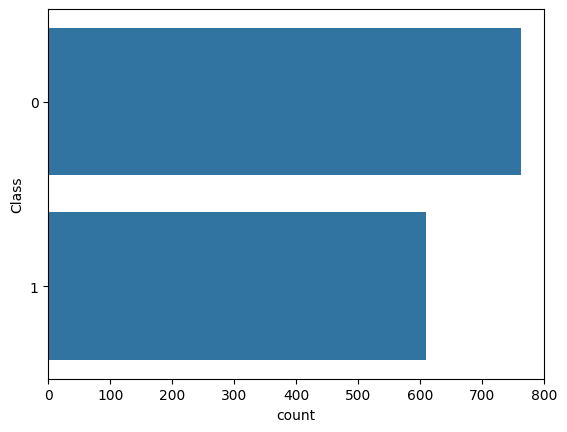

In [16]:
sns.countplot(y = y);

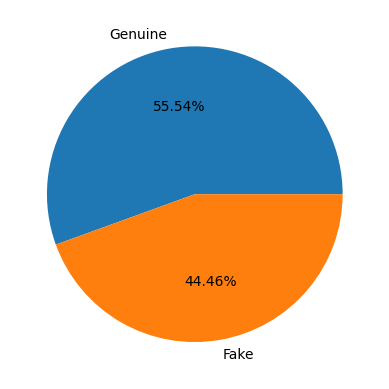

In [18]:
plt.pie(y.value_counts(), labels=['Genuine','Fake'], autopct='%2.2f%%');

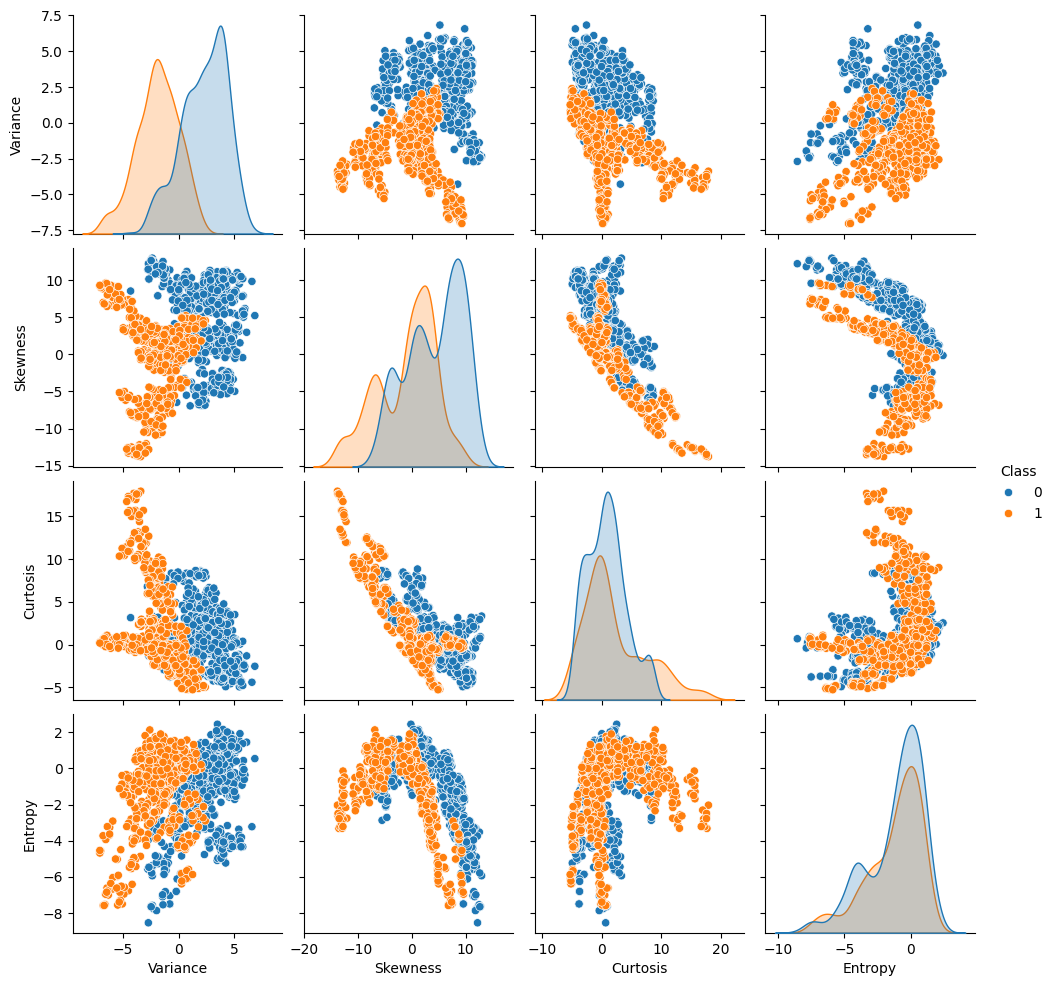

In [19]:
sns.pairplot(df, hue = 'Class')

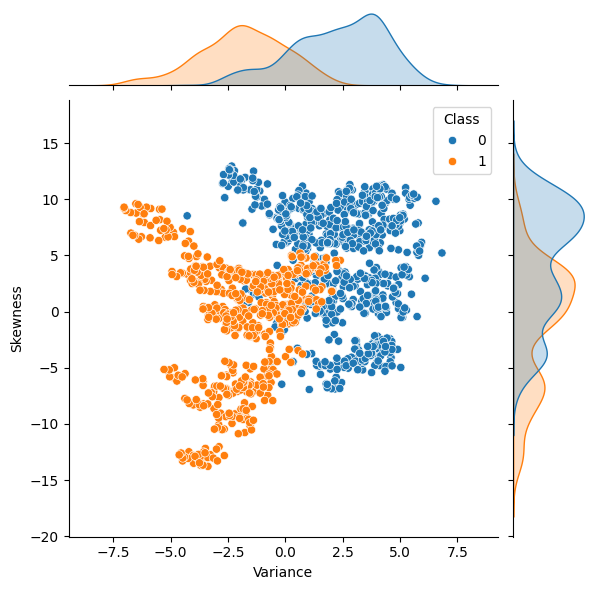

In [20]:
sns.jointplot(x = 'Variance', y = 'Skewness', data = df, hue = 'Class');

##### Cross Validation

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [27]:
x_train.shape, x_test.shape

((1029, 4), (343, 4))

##### Build the tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
tree = DecisionTreeClassifier(random_state=0)

In [28]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

##### Plot the tree

In [30]:
from sklearn.tree import plot_tree

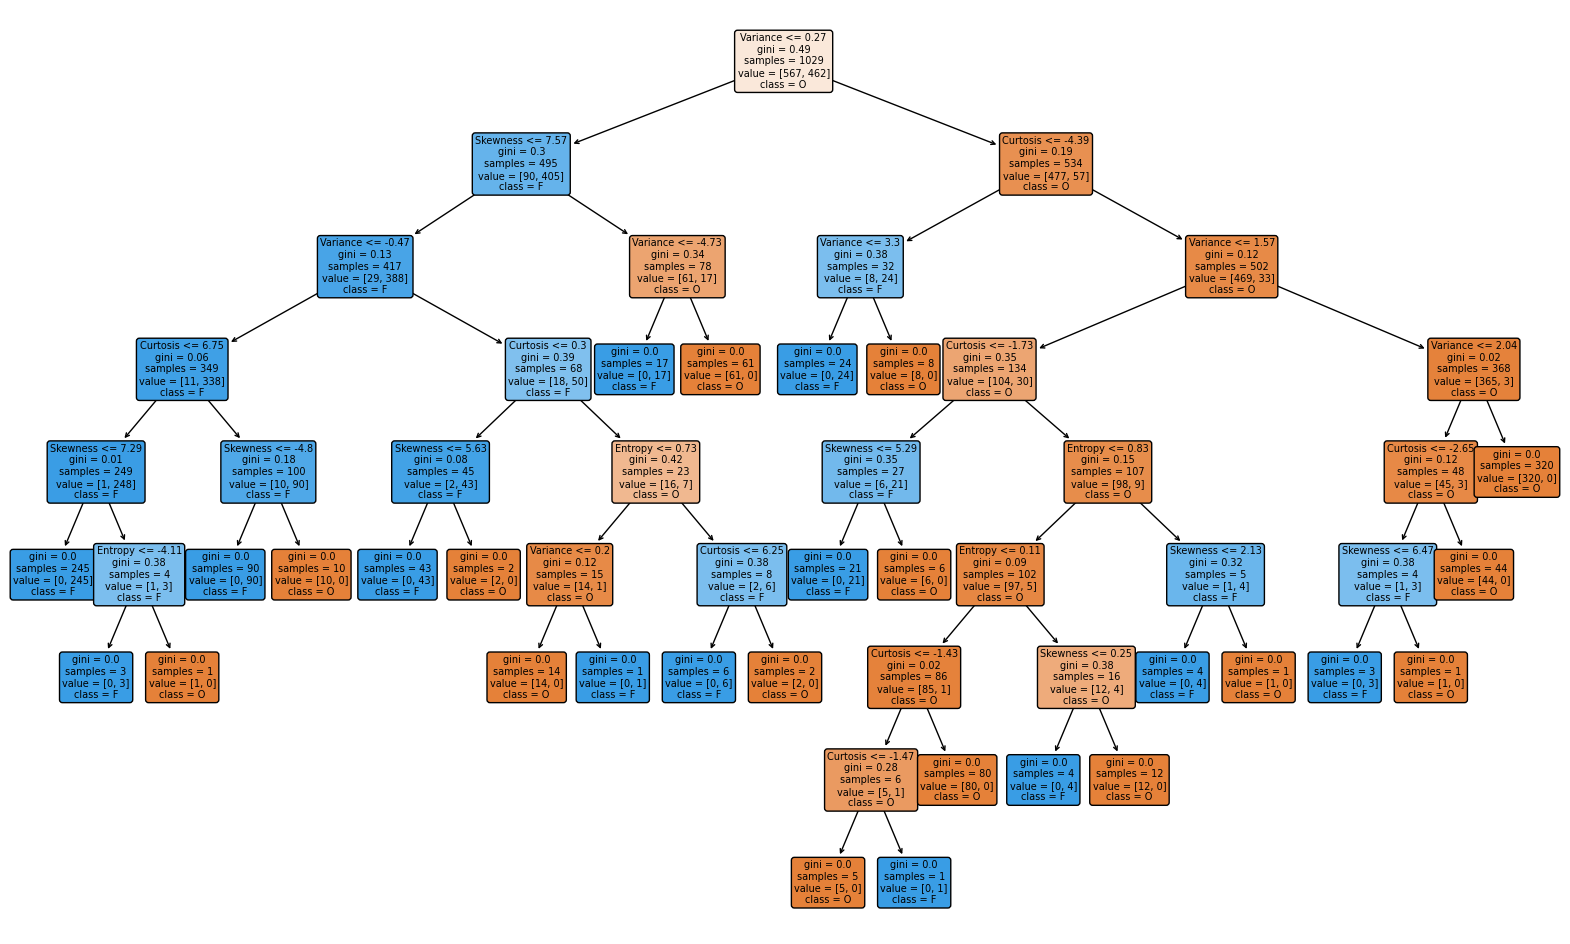

In [38]:
plt.figure(figsize=(20,12))
plot_tree(tree, fontsize=7, feature_names=x.columns, class_names=['O','F'],
         filled=True, rounded=True, precision=2);
plt.savefig('mytree.png')

##### Performance Evaluation

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

In [41]:
y_pred = tree.predict(x_test)

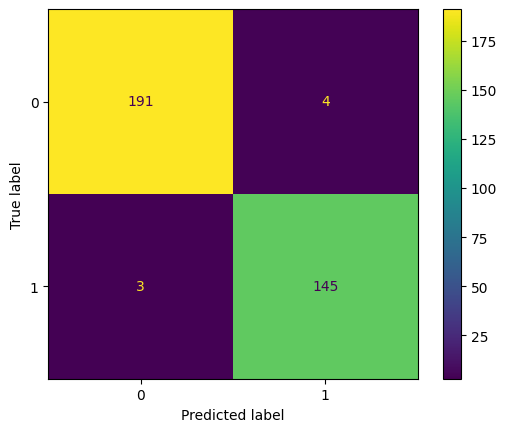

In [42]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [43]:
accuracy_score(y_test, y_pred)

0.9795918367346939

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



In [45]:
imp = tree.feature_importances_

<BarContainer object of 4 artists>

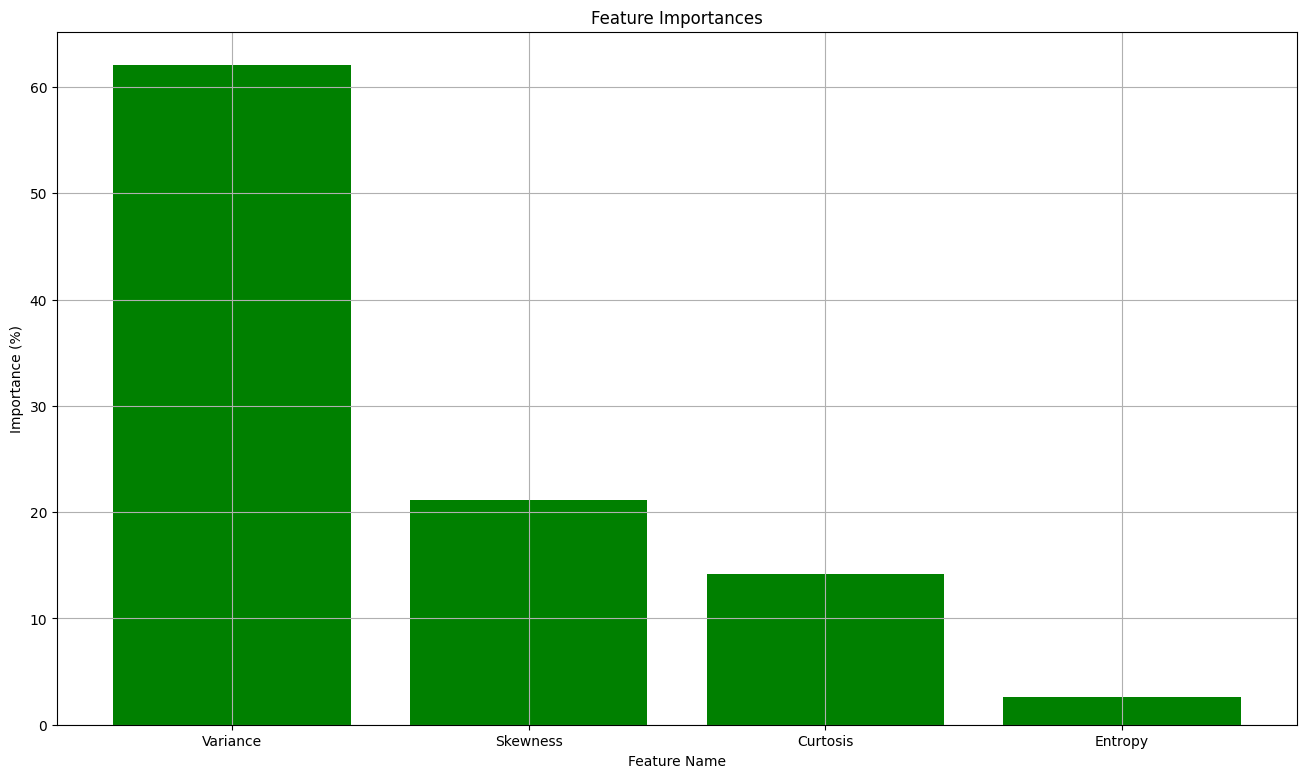

In [48]:
plt.figure(figsize=(16,9))
plt.title('Feature Importances')
plt.xlabel('Feature Name')
plt.ylabel('Importance (%)')
plt.grid()
plt.bar(x.columns, imp * 100, color = 'g')

In [53]:
ndf = pd.DataFrame(data=[[0.32924, -4.45520, 4.5718, -0.98880],
                        [-1.38870, -4.87730, 6.4774, 0.34179],
                        [4.54590, 8.16740, -2.4586, -1.46210]], columns=x.columns)

In [54]:
ndf

,Variance,Skewness,Curtosis,Entropy
0,0.32924,-4.4552,4.5718,-0.98880
1,-1.38870,-4.8773,6.4774,0.34179
2,4.54590,8.1674,-2.4586,-1.46210


In [55]:
tree.predict(ndf)

array([0, 1, 0])